In [1]:
import tensorflow as tf
import numpy as np
import scipy
from scipy.signal import butter, filtfilt, hilbert
from scipy import fftpack
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pyaudio

<IPython.core.display.Javascript object>


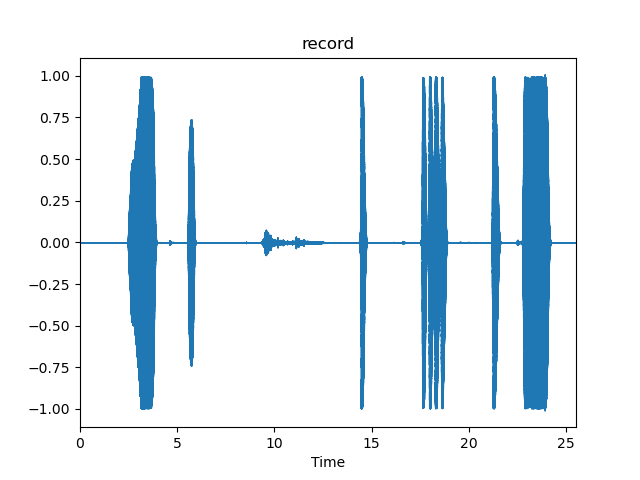

22050


In [4]:
#导入音频文件
sound,sr = librosa.load('../processing/sound02.wav')
sound = sound[:-2500]
%matplotlib notebook
plt.figure(1);
librosa.display.waveplot(sound,sr) #画出图像
plt.title("record")
ipd.Audio('../processing/sound02.wav') #播放音频
print(sr) #采样率
#这里开始whole可以作为数据集使用
time = librosa.get_duration(filename='../processing/sound02.wav')

In [3]:
ipd.Audio(sound,rate=sr)

In [16]:
frame_length = 500; #分窗大小
hop_length = 20; #跳距
num =int((len(sound)-frame_length)/hop_length)+1 #y点数
print(num)
sound_2 = np.ones(num)
for i in range(num):
    sound_2[i] = max(sound[hop_length*i:hop_length*i+frame_length]) #每隔hop_length的frame_length内最大值
t4=np.arange(sound.size)/sr   #原始点数
t5=np.arange(len(rms))*hop_length/sr
rms = librosa.feature.rms(y=sound,frame_length = frame_length,hop_length=hop_length).T

28098


<IPython.core.display.Javascript object>


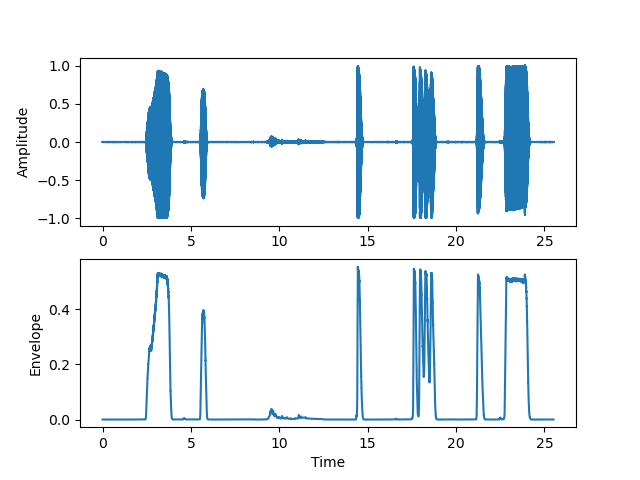

(28098,)

In [17]:
plt.figure(2)
plt.title("振幅包络")
plt.subplot(2,1,1)
plt.plot(t4,sound)
plt.ylabel("Amplitude")
plt.subplot(2,1,2)
plt.plot(t5,rms)
plt.ylabel("Envelope")
plt.xlabel("Time")
sound_2.shape

82


<IPython.core.display.Javascript object>


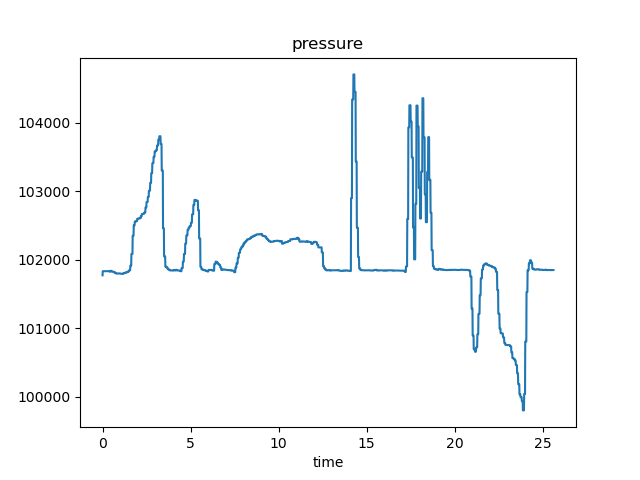

Text(0.5, 0, 'time')

In [7]:
pressure = np.loadtxt('../processing/pressure.txt')
sr_p = int(len(pressure) / time)
t = np.linspace(0,time,len(pressure))
print(sr_p)
plt.figure(3)
plt.plot(t,pressure)
plt.title("pressure")
plt.xlabel("time")

101817.18144000001


<IPython.core.display.Javascript object>


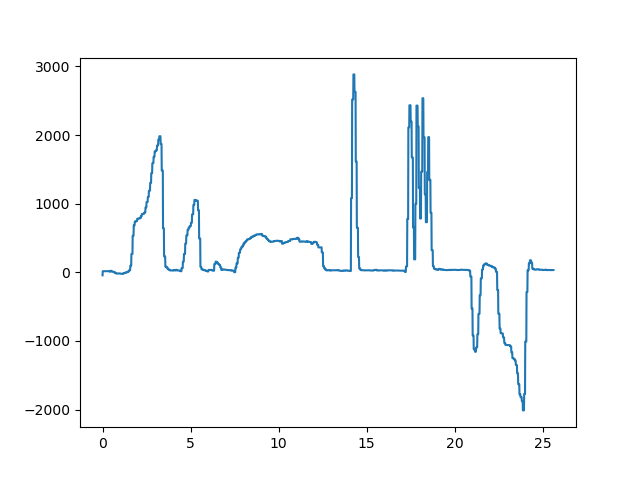

In [7]:
#求静止时气压
pressure_0 = np.mean(pressure[:125])
print(pressure_0)
pressure_1 = pressure-pressure_0
plt.figure(4)
# plt.plot(pressure[:200])
plt.plot(t,pressure_1)

<IPython.core.display.Javascript object>


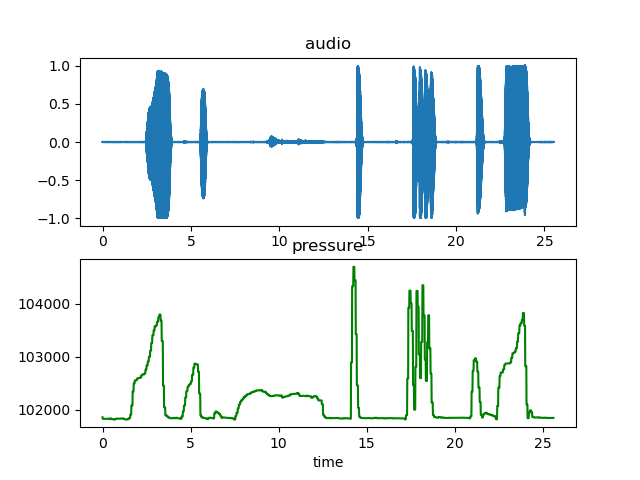

Text(0.5, 0, 'time')

In [8]:
pressure_2 = abs(pressure_1)
plt.figure(5)
plt.subplot(2,1,1)
plt.plot(t4,sound)
plt.title("audio")

plt.subplot(2,1,2)
plt.plot(t,pressure_2+pressure_0,color='green')
plt.title("pressure")
plt.xlabel('time')

<IPython.core.display.Javascript object>


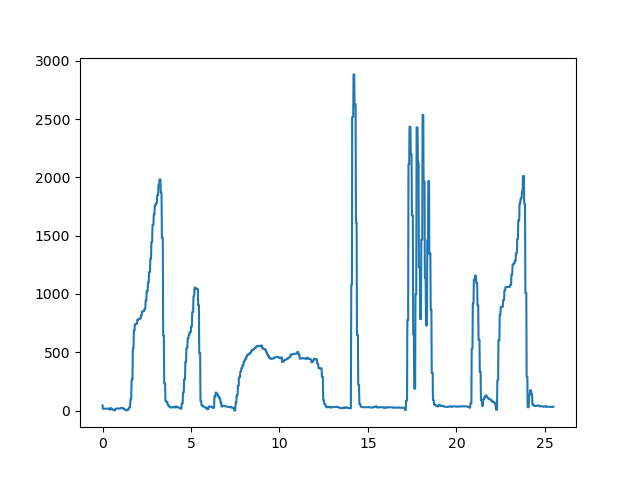

In [46]:
#上采样
t1 = np.linspace(0,len(sound_2),len(sound_2))
t2 = np.linspace(0,len(pressure_2),len(pressure_2))
t3 = np.linspace(0,len(pressure_2),len(sound_2))
from scipy import interpolate
f = interpolate.interp1d(t2,pressure_2)
# dnew = np.linspace(0,max(t2),len(whole))
pressure_3 = f(t3)
plt.figure(6)
plt.plot(t5,pressure_3)
# plt.plot(t2,pressure_2)

In [10]:
# frame_length = 1000; #分窗大小
# hop_length = 128; #傅里叶变换长度
# rms = librosa.feature.rms(y=sound,frame_length = frame_length,hop_length=hop_length).T #计算音频的平均能量值
t6=np.arange(sound.size)/sr
t7=np.arange(sound_2.shape[0])*hop_length/sr


intervals1=np.empty(shape=[0,2])
i0=-1  #起始点初始值
i1=-1  #结束点初始值
lim=max(sound_2)/10#设能量阈值为平均能量的最大值的1/5
#计算端点
for i in range(t5.shape[0]):
    if i0<0: #查找起始点
        if sound_2[i]>lim: #如果分窗的平均能量大于阈值
            i0=i #从这一分窗开始记入人声片段
        else:
            sound_2[i] = 0
    else:  #查找结束点
        if sound_2[i]<lim: #如果分窗的平均能量小于阈值
            i1=i #从这一分窗开始不计入人声片段
            intervals1=np.append(intervals1,[[i0,i1]],axis=0) #记录起始点和结束点位置
            i0=-1#重设起始点

<IPython.core.display.Javascript object>


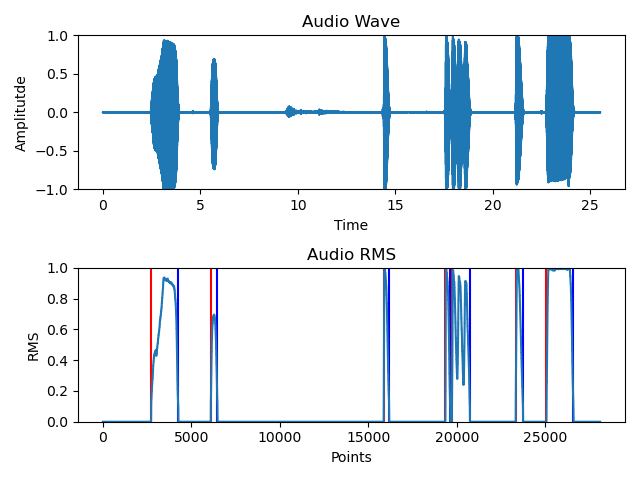

In [11]:

f,ax = plt.subplots(2)
li1, = ax[0].plot(t4, sound) #总音频图像
ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitutde',ylim=(-1,1)) 
li2, = ax[1].plot(sound_2) #分段结果
ax[1].vlines(x=intervals1[:,0],ymin=0,ymax=1,color='red') #用红色辅助线标出人声起始点
ax[1].vlines(x=intervals1[:,1],ymin=0,ymax=1,color='blue') #用蓝色辅助线标出人声结束点
ax[1].set(title='Audio RMS',xlabel='Points',ylabel='RMS',ylim=(0,1))
plt.tight_layout()
plt.show()

In [12]:

# t8=np.arange(pressure_2.shape[0])*hop_length/sr


intervals2=np.empty(shape=[0,2])
i0=-1  #起始点初始值
i1=-1  #结束点初始值
lim=max(pressure_3)/4#设能量阈值为平均能量的最大值的1/5
#计算端点
for i in range(t5.shape[0]):
    if i0<0: #查找起始点
        if pressure_3[i]>lim: #如果分窗的平均能量大于阈值
            i0=i #从这一分窗开始记入人声片段
    else:  #查找结束点
        if pressure_3[i]<lim: #如果分窗的平均能量小于阈值
            i1=i #从这一分窗开始不计入人声片段
            intervals2=np.append(intervals2,[[i0,i1]],axis=0) #记录起始点和结束点位置
            i0=-1#重设起始点

<IPython.core.display.Javascript object>


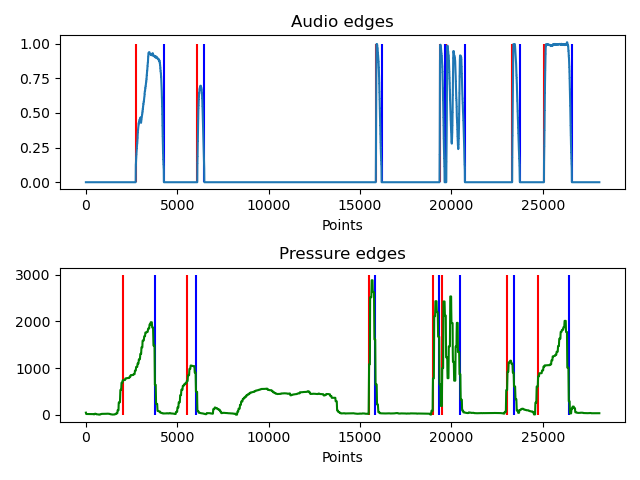

In [13]:
f,ax = plt.subplots(2)
li1, = ax[0].plot(sound_2) #分段结果
ax[0].vlines(x=intervals1[:,0],ymin=0,ymax=1,color='red') #用红色辅助线标出人声起始点
ax[0].vlines(x=intervals1[:,1],ymin=0,ymax=1,color='blue') #用蓝色辅助线标出人声结束点
ax[0].set(title='Audio edges',xlabel='Points')
li2, = ax[1].plot(pressure_3,color='green') #分段结果
ax[1].vlines(x=intervals2[:,0],ymin=0,ymax=3000,color='red') #用红色辅助线标出人声起始点
ax[1].vlines(x=intervals2[:,1],ymin=0,ymax=3000,color='blue') #用蓝色辅助线标出人声结束点
ax[1].set(title='Pressure edges',xlabel='Points')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


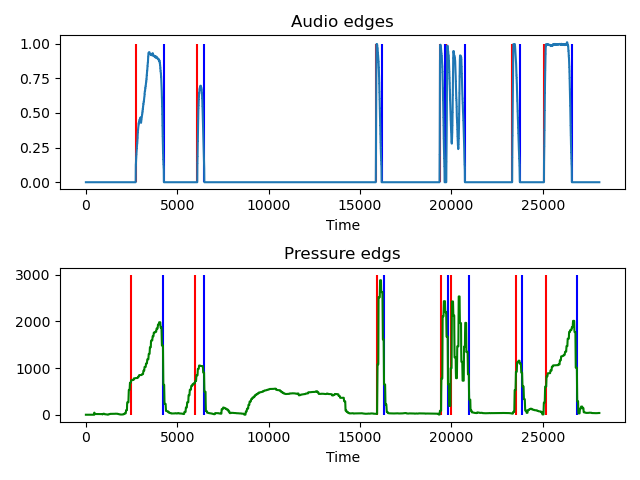

In [14]:
gap = int(intervals1[1][1]-intervals2[1][1])
blank = np.zeros(gap)
pressure_4 = np.append(blank,pressure_3[:-gap])

intervals3 = intervals2+gap



f,ax = plt.subplots(2)
li1, = ax[0].plot(sound_2) #分段结果
ax[0].vlines(x=intervals1[:,0],ymin=0,ymax=1,color='red') #用红色辅助线标出人声起始点
ax[0].vlines(x=intervals1[:,1],ymin=0,ymax=1,color='blue') #用蓝色辅助线标出人声结束点
ax[0].set(title='Audio edges',xlabel='Time')
li2, = ax[1].plot(pressure_4,color='green') #分段结果
ax[1].vlines(x=intervals3[:,0],ymin=0,ymax=3000,color='red') #用红色辅助线标出人声起始点
ax[1].vlines(x=intervals3[:,1],ymin=0,ymax=3000,color='blue') #用蓝色辅助线标出人声结束点
ax[1].set(title='Pressure edgs',xlabel='Time')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


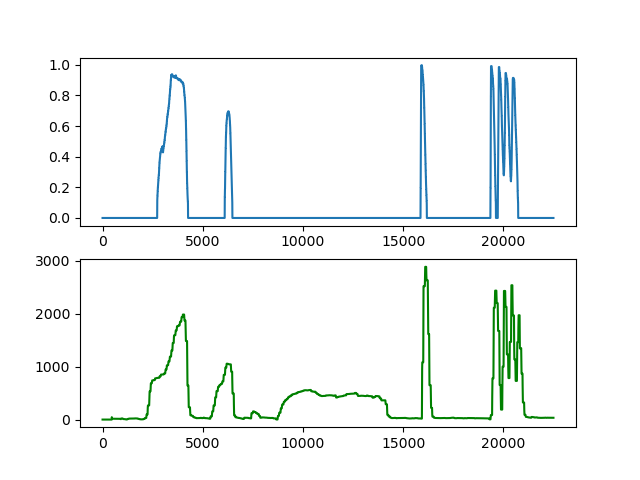

In [16]:
sound_3 = sound_2[:22500]
pressure_5 = pressure_4[:22500]            
plt.figure(12)
plt.subplot(2,1,1)
plt.plot(sound_3)
plt.subplot(2,1,2)
plt.plot(pressure_5,'green')

In [128]:
X = X-500
Y = Y

import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()

learn_rate = 0.01
#用placeholder定义X和Y变量，具体值在训练的是用feed_dict填充
X1 = tf.placeholder(tf.float32)
Y1 = tf.placeholder(tf.float32)
 
#定义初始化W和b，一般不建议置0，用随机值初始化
W = tf.Variable(np.random.random(), name="weigth")
b = tf.Variable(np.random.random(), name="bias")
 
#带预测的线性方程
prediction = tf.add(tf.multiply(X1, W), b)
 
#用最小二乘定义损失函数
cost = tf.reduce_mean(tf.square(prediction - Y1))
 
#这里优化器并没有用梯度下降，而用的是Adam优化器，后面说明，优化，使得cost最小
#optimizer = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)
optimizer = tf.train.AdamOptimizer(learn_rate).minimize(cost)
 
init = tf.global_variables_initializer()
 
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        for (x, y) in zip(X, Y):
            #执行定义的优化器，填充placeholder定义的变量
            sess.run(optimizer, feed_dict={X1:x, Y1:y})
 
        if i % 50 == 0:
            #每隔50次打印一次cost，由于cost依赖X和Y，所以也需要用feed_dict填充
            c = sess.run(cost, feed_dict={X1: X, Y1: Y})
            print("Epoch:", '%04d' % i, "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

 
    print("Optimization Finished!")
 
    training_cost = sess.run(cost, feed_dict={X1: X, Y1: Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    plt.figure(18)
    
    plt.plot(X, Y, 'ro', label="origal data")
    plt.plot(X, sess.run(W) * X + sess.run(b), label="fit line")
    plt.legend()


Epoch: 0000 cost= 0.528867006 W= -0.00021285423 b= -0.18154423
Epoch: 0050 cost= 0.621611357 W= -0.0019728981 b= 1.6070124


KeyboardInterrupt: 

In [60]:
len(pressure_2)

2111

In [63]:
len(t2)

50

In [64]:
t2

array([   0.        ,   43.08163265,   86.16326531,  129.24489796,
        172.32653061,  215.40816327,  258.48979592,  301.57142857,
        344.65306122,  387.73469388,  430.81632653,  473.89795918,
        516.97959184,  560.06122449,  603.14285714,  646.2244898 ,
        689.30612245,  732.3877551 ,  775.46938776,  818.55102041,
        861.63265306,  904.71428571,  947.79591837,  990.87755102,
       1033.95918367, 1077.04081633, 1120.12244898, 1163.20408163,
       1206.28571429, 1249.36734694, 1292.44897959, 1335.53061224,
       1378.6122449 , 1421.69387755, 1464.7755102 , 1507.85714286,
       1550.93877551, 1594.02040816, 1637.10204082, 1680.18367347,
       1723.26530612, 1766.34693878, 1809.42857143, 1852.51020408,
       1895.59183673, 1938.67346939, 1981.75510204, 2024.83673469,
       2067.91836735, 2111.        ])

In [93]:
frame_length = 100; #分窗大小
hop_length = 20; #跳距
num =int((len(sound)-frame_length)/hop_length)+1 #y点数
print(num)
sound_2 = np.ones(num)
for i in range(num):
    sound_2[i] = max(sound[hop_length*i:hop_length*i+frame_length]) #每隔hop_length的frame_length内最大值
t4=np.arange(sound.size)/sr   #原始点数
t5=np.arange(num)*hop_length/sr

28118


<IPython.core.display.Javascript object>


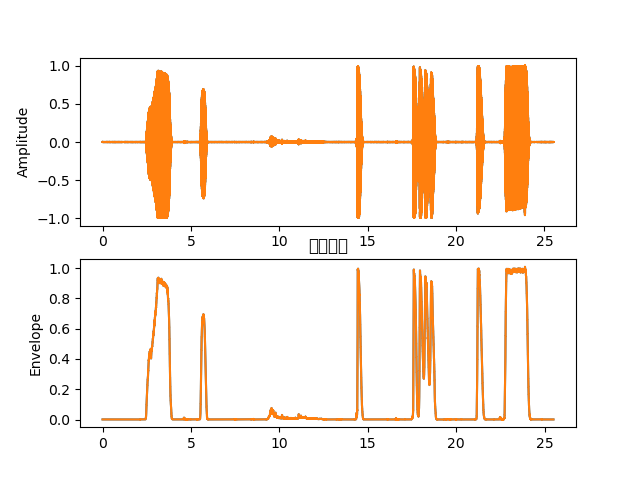

Text(0, 0.5, 'Envelope')

In [94]:
plt.figure(6)
plt.title("振幅包络")
plt.subplot(2,1,1)
plt.plot(t4,sound)
plt.ylabel("Amplitude")
plt.subplot(2,1,2)
plt.plot(t5,sound_2)
plt.ylabel("Envelope")




# f,ax = plt.subplots(2)
# li1, = ax[0].plot(t1, sound) #总音频图像
# ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Envelope',ylim=(-1,1)) 
# li2, = ax[1].plot(t2, sound_2) #振幅包络
# ax[0].set(title='Audio Wave',xlabel='Time',ylabel='Amplitude',ylim=(-1,1)) 
# plt.tight_layout()
# plt.show()

 
0.001313 x - 0.7649


<IPython.core.display.Javascript object>


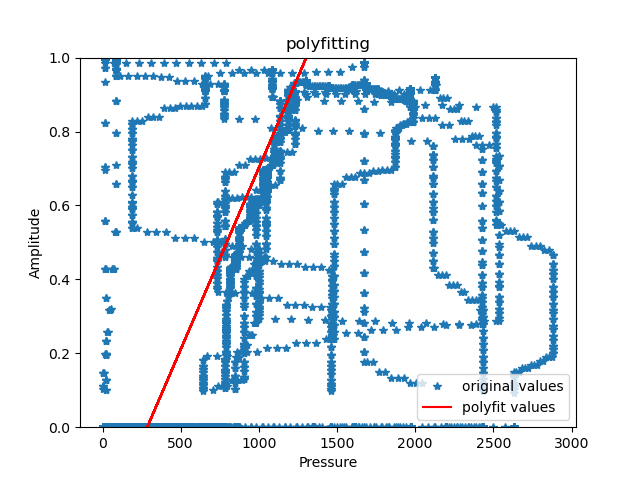

In [104]:
x = X
y = Y
z1 = np.polyfit(x, y,1)#用4次多项式拟合
p1 = np.poly1d(z1)
print(p1) #在屏幕上打印拟合多项式
yvals=p1(x)#也可以使用yvals=np.polyval(z1,x)
plt.figure(19)
plot1=plt.plot(pressure_5, sound_3, '*',label='original values')
plot2=plt.plot(pressure_5, 0.0009828395*pressure_5 -0.2807837, 'r',label='polyfit values')
plt.xlabel('Pressure')
plt.ylabel('Amplitude')
plt.ylim(0,1)
plt.legend(loc=4)#指定legend的位置,读者可以自己help它的用法
plt.title('polyfitting')
plt.show()
plt.savefig('p1.png')

In [113]:
pressure_3

array([-0.28105994, -0.28105994, -0.28105994, ..., -0.28105994,
       -0.28105994, -0.28105994])

In [92]:
len(sound_2)

562352

In [15]:
Z = np.array([pressure_5,sound_3])
print(Z)
Z1=Z[:,Z[0].argsort()]

NameError: name 'pressure_5' is not defined

<IPython.core.display.Javascript object>


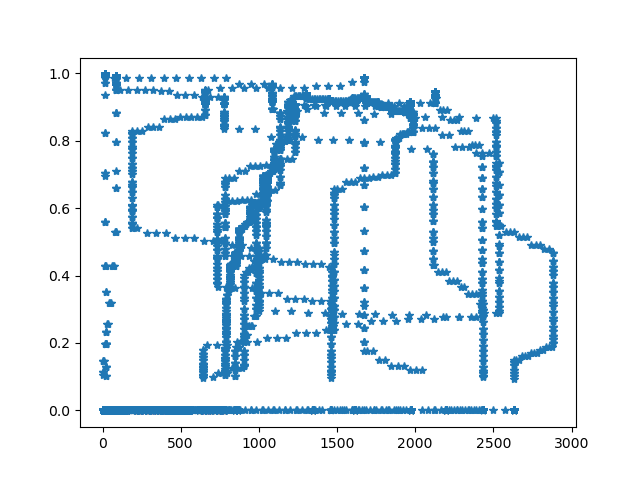

In [35]:
plt.figure(15)
plt.plot(Z1[0],Z1[1],'*')

In [51]:
X = []
Y = []
for i in range(len(Z1[0])):
    if Z1[0][i]>600 and Z1[1][i]<0.95 and Z1[0][i]<1300:
        X = np.append(X,Z1[0][i])
        Y = np.append(Y,Z1[1][i])

<IPython.core.display.Javascript object>


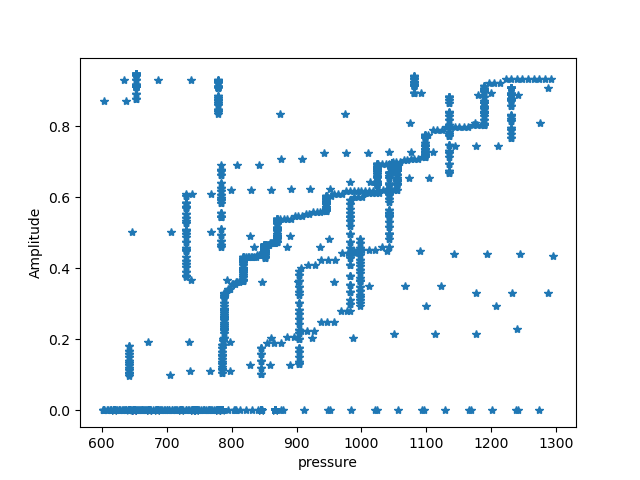

Text(0, 0.5, 'Amplitude')

In [52]:
plt.figure(17)
plt.plot(X,Y,'*')
plt.xlabel("pressure")
plt.ylabel("Amplitude")

In [72]:
pressure.shape

(2111,)

<IPython.core.display.Javascript object>


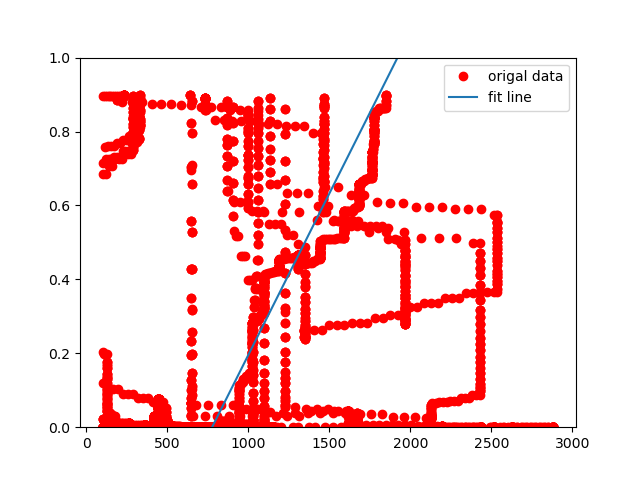

In [149]:

plt.figure(10)
plt.plot(X, Y, 'ro', label="origal data")
plt.plot(X, 0.00087336014* X -0.6780956, label="fit line")
plt.ylim(0,1)
plt.legend()

<IPython.core.display.Javascript object>


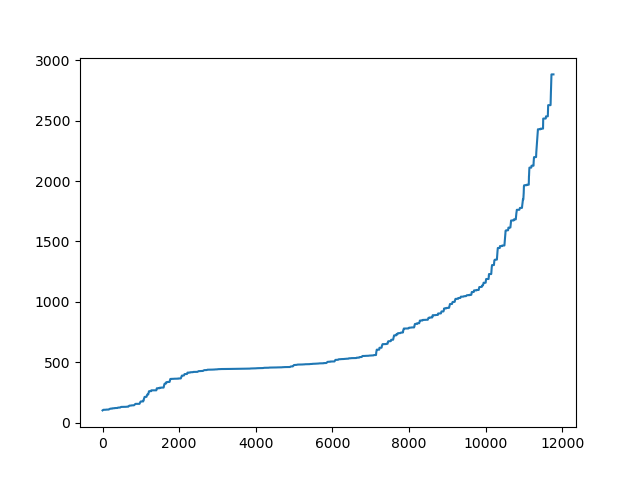

In [145]:
plt.figure(11)
plt.plot(X1)

In [17]:
from sympy import *
x = Symbol('x')
print(solve([0.00087336014* x -0.6780956-1],[x]))


{x: 1921.42453398434}


In [25]:
result = []
for i in pressure_3:
    if i < 776 :
        result = np.append(result,0)
    elif i >1921:
        result = np.append(result,1)
    else:
        result = np.append(result,0.00087336014* i -0.6780956)
print(result)

[0. 0. 0. ... 0. 0. 0.]


<IPython.core.display.Javascript object>


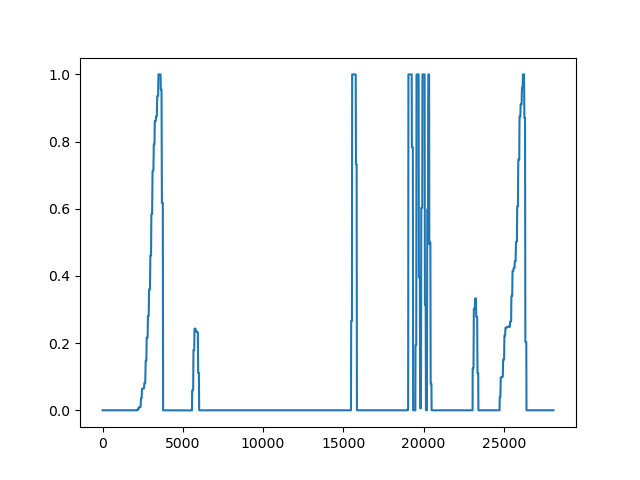

In [26]:
plt.figure(12)
plt.plot(result)

<IPython.core.display.Javascript object>


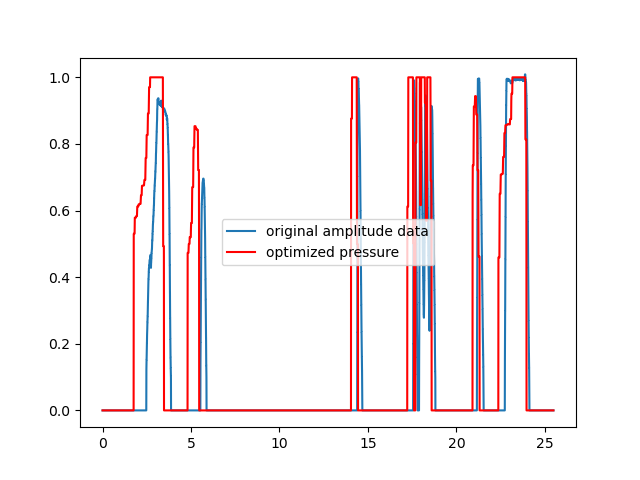

In [47]:
pressure_6 = pressure_3
for i in range(len(pressure_3)):
    if pressure_3[i]<600:
        pressure_6[i]=0
    elif 0.00087336014*pressure_3[i]  -0.06780956>1:
        pressure_6[i]=1
    else:
        pressure_6[i]=0.00087336014*pressure_3[i]  -0.06780956

plt.figure(20)
plt.plot(t5,sound_2,label='original amplitude data')
plt.plot(t5,pressure_6,color='red',label='optimized pressure')
# plt.ylim(0,1)
plt.legend()

<IPython.core.display.Javascript object>


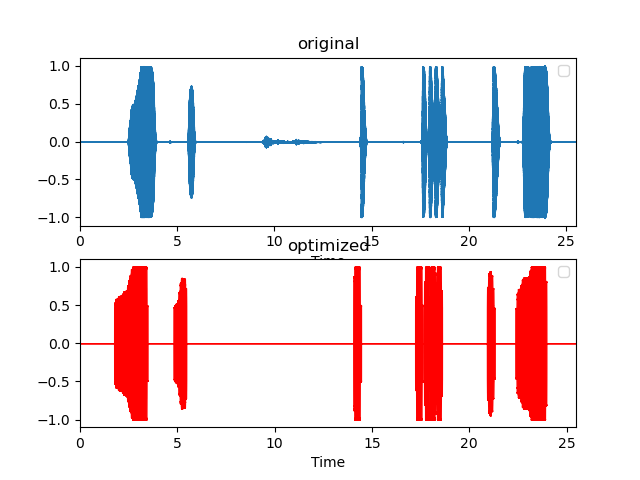

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [72]:
import pyaudio

p = pyaudio.PyAudio()

volume = pressure_7     # range [0.0, 1.0]
fs = 22050       # sampling rate, Hz, must be integer
duration = t5[-1]  # in seconds, may be float
f = 440.0        # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)
t1 = np.linspace(0,len(samples),len(samples))
t2 = np.linspace(0,len(pressure_6),len(pressure_6))
t3 = np.linspace(0,len(pressure_6),len(samples))
from scipy import interpolate
f = interpolate.interp1d(t2,pressure_6)
# dnew = np.linspace(0,max(t2),len(whole))
pressure_7 = f(t3)
# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
# stream.write(volume*samples)

# stream.stop_stream()
# stream.close()

p.terminate()
plt.figure(21)
plt.subplot(2,1,1)
librosa.display.waveplot(sound,sr)
plt.title('original')
plt.legend()
# plt.x_axis('time')
plt.subplot(2,1,2)
librosa.display.waveplot(volume*samples,sr,color='red')
plt.title('optimized')
plt.legend()

<IPython.core.display.Javascript object>


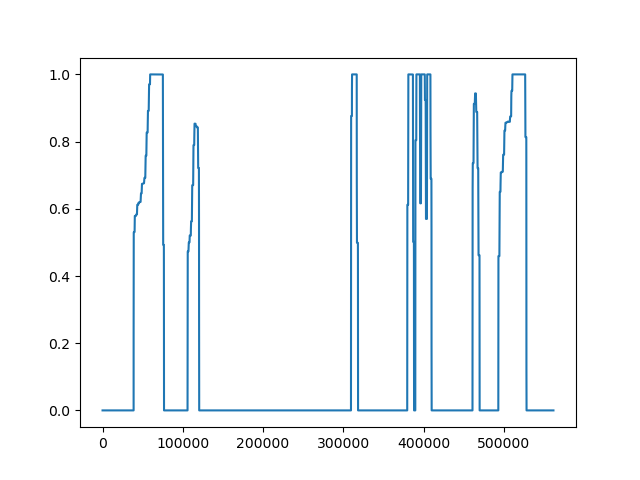

In [48]:
#上采样
t1 = np.linspace(0,len(samples),len(samples))
t2 = np.linspace(0,len(pressure_6),len(pressure_6))
t3 = np.linspace(0,len(pressure_6),len(samples))
from scipy import interpolate
f = interpolate.interp1d(t2,pressure_6)
# dnew = np.linspace(0,max(t2),len(whole))
pressure_7 = f(t3)
plt.figure(22)
plt.plot(t1,pressure_7)

In [53]:
volume.shape

(561940,)

In [54]:
samples.shape

(561940,)

In [55]:
t3.shape

(561940,)

In [56]:
len(volume*samples)

561940